# Task 1

Task 1: Build a **Multiple Linear Regression model** that predicts the number of deaths in various countries due to COVID-19. You are free to select and choose the dataset you would like to use while building the model and are allowed to use the Pandas Library in your code and can use Excel.

The following technical/tool constraint applies: you are NOT allowed to use any existing machine learning packages, such as scikit-learn.

As a general guide, you may need to undertake the following actions:
- Find data sets for the **number of deaths** in various countries **(a minimum of 20 countries)** due to COVID-19.
- Research for appropriate predictor variables to predict deaths due to COVID-19.
- You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
- Find data sets on the chosen predictors for the various countries in the model.
- Use **plots** to visualize and understand your data.
- Build a **model** and **test the accuracy of your model**, using an appropriately chosen metric(hint: r2 is not a good metric for this task).
- If needed, improve your model by incorporating other predictors, and/or removing existing ones.
- Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.

In [53]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data 
We use data from [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/README.md) 

In [54]:
# importing the dataset by reading the csv file
pd.reset_option('display.max_rows')
df = pd.read_csv('covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134011,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134012,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134013,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Cleaning data

In [55]:
pd.set_option('display.max_rows', None)
print(pd.options.display.max_rows)
pd.reset_option('display.max_rows')

None


In [56]:
df.isna().sum()

iso_code                                        0
continent                                    8552
location                                        0
date                                            0
total_cases                                  7363
                                            ...  
human_development_index                     18110
excess_mortality_cumulative_absolute       129292
excess_mortality_cumulative                129292
excess_mortality                           129292
excess_mortality_cumulative_per_million    129292
Length: 67, dtype: int64

In [57]:
df.duplicated().sum()

0

### Filter data
Target: `total_deaths`

Factors affecting death rates: (according to research)

*Factors we have data for and will explore are in **bold***

Healthcare Systems (healthcare capacity)
- `icu_patients`
- `icu_patients_per_million`
- `hosp_patients`
- `hosp_patients_per_million`
- `hospital_beds_per_thousand`
- `handwashing_facilities`

Nature of disease
- `reproduction_rate` (measure no of contacts per unit time)

National Policies
- `stringency_index` 
- `total_tests`
- `total_vaccinations`

Demographics/health
- `population_density`
- `aged_65_older` (Share of the population that is 65 years and older, most recent year available)
- ~~`cardiovasc_death_rate`~~
- ~~`diabetes_prevalence`~~

Economy
- `gdp_per_capita`
- `extreme_poverty`

Others
- `continent`
- `location`
- `date`


In [58]:
columns=['date','location','continent','population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_covid = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns]

In [59]:
df_covid=df_covid.fillna(0)

### Visualising data

Text(0.5, 1.0, 'Total deaths vs date')

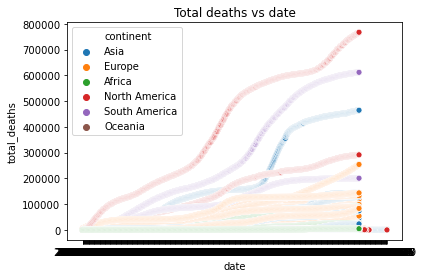

In [60]:
myplot = sns.scatterplot(x='date', y='total_deaths', hue='continent', data=df)
myplot.set_title('Total deaths vs date', fontsize=12)

In [61]:
columns_cat=['date','location','continent']
columns_num=['population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_cat = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_cat]

df_num = df.loc[((df['location']=='Austria')| (df['location']=='Belgium') | (df['location']=='Bulgaria') | (df['location']=='Croatia') | 
(df['location']=='Cyprus') | (df['location']=='Czech Republic') | (df['location']=='Denmark') | (df['location']=='Estonia') | (df['location']=='Finland') | 
(df['location']=='France') | (df['location']=='Germany') | (df['location']=='Greece') | (df['location']=='Hungary') | (df['location']=='Ireland') | 
(df['location']=='Italy') | (df['location']=='Latvia') | (df['location']=='Lithuania') | (df['location']=='Luxembourg') | 
(df['location']=='Malta') | (df['location']=='Netherlands') | (df['location']=='Poland') | (df['location']=='Portugal') | (df['location']=='Romania')| 
(df['location']=='Slovakia')| (df['location']=='Spain')| (df['location']=='Sweden')| (df['location']=='United Kingdom')| (df['location']=='United States')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_num]

def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

data_norm = normalize_z(df_num)
stats = data_norm.describe()
# display(stats)

frames=[df_cat , data_norm]
result = pd.concat(frames,axis=1)
result = result.fillna(0)
# display(result)

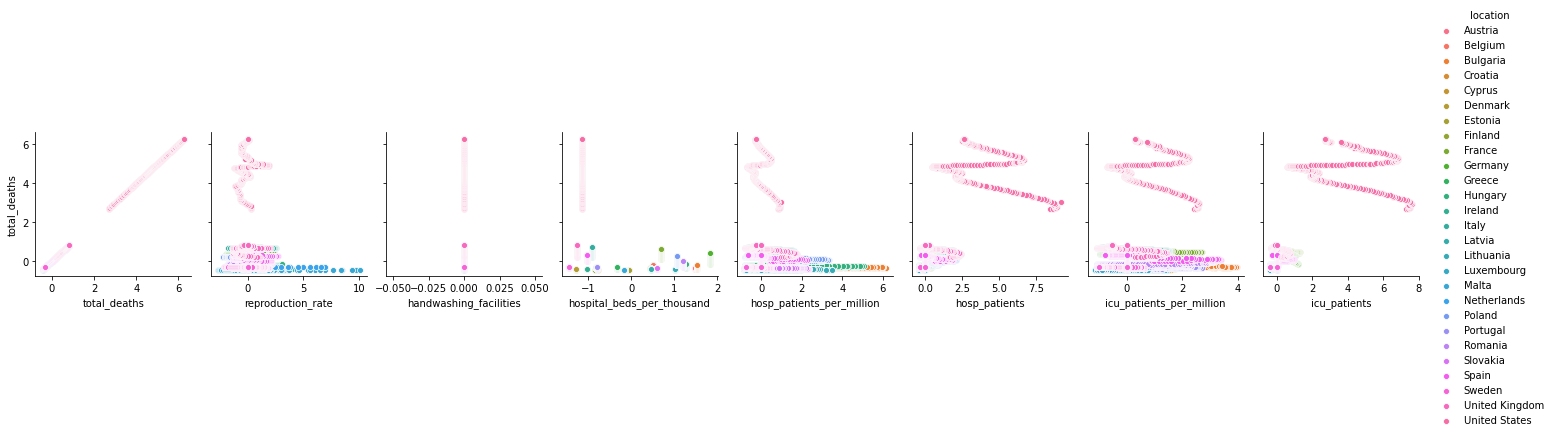

In [62]:
myplot = sns.pairplot(data=result, hue='location',x_vars=['total_deaths','reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients'],y_vars=['total_deaths'])

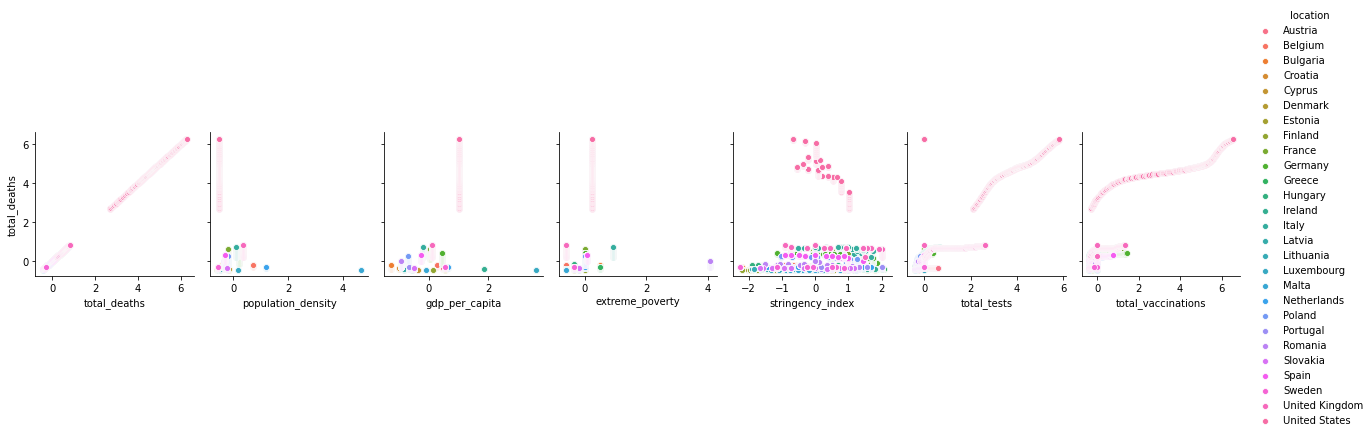

In [63]:
myplot = sns.pairplot(data=result, hue='location',x_vars=['total_deaths','population_density','gdp_per_capita',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations'],y_vars=['total_deaths'])

### Build model

In [72]:
def normalize_z(df):
    dfout=(df-df.mean(axis=0))/df.std(axis=0)
    return dfout

def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

def get_features_targets(df, feature_names, target_names):
    df_feature=df.loc[:,feature_names]
    df_target=df.loc[:,target_names]
    return df_feature, df_target

def compute_cost(X, y, beta):
    J = 0
    #calculate m, no of rows/data pt
    m = X.shape[0]
    
    #calculate yp, predicted target value from X and beta
    yp = np.matmul(X, beta)
    
    #calculate the error
    error = yp-y
    
    #calculate the cost
    J = (1/(2*m))*np.matmul(error.T, error)
    J= J[0][0] #to get the float
    return J

def prepare_feature(df_feature):
    #numpy is just arrays
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0],1))
    X = np.concatenate((array1, feature), axis = 1)
    return X

def prepare_target(df_target):
    return df_target.to_numpy() 

def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from shape of X or y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)

    #for the number of iterations
    for n in range(num_iters):
        #--> compute the predicted y
        yp = np.matmul(X, beta)
        
        #--> compute the error
        error = yp - y
        
        #--> compute the new beta
        beta = beta - (alpha/m)*np.matmul(X.T, error)
        
        #--> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    X = prepare_feature(df_feature)
    yp = predict_norm(X, beta)
    return yp

def mean_squared_error(target, pred):
    n=target.shape[0]
    error=target-pred
    mse=(1/n)*np.sum(error**2)
    return mse

def r2_score(y, ypred):
    # calculate ssres
    diff = y - ypred
    ssres = np.matmul(diff.T, diff)[0][0]
    
    # calculate sstot
    ymean=np.mean(y)
    diff_mean=y-ymean #element wise subtraction
    sstot= np.matmul(diff_mean.T, diff_mean)[0][0]
    
    # calcuate r2
    return 1-(ssres/sstot)

def adj_r2_score(X,y,ypred):
    r2=r2_score(y, ypred)
    adj_r2=1 - ((1-r2)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))
    return adj_r2

### Obtain coefficents via gradient descent and normal equation

In [73]:
# print(df_covid.describe())
# Get features and targets from data frame
feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']

df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])

# Normalize features
df_feature_z=normalize_z(df_feature)

# Export same set of data to excel for excel analysis 
frames=[df_feature_z , df_target]
excel = pd.concat(frames,axis=1)
excel = excel.fillna(0)
# display(excel)
excel.to_excel("covid_data_excel.xlsx")

# Prepare X and target vector
X = prepare_feature(df_feature_z)
m=X.shape[1]
target = prepare_target(df_target)

# Set up gradient descent
iterations = 1500
alpha = 0.01
beta = np.zeros((m,1))

# Call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
# with np.printoptions(threshold=np.inf):
#     print(beta)

# Normal equation
X_sq=np.linalg.inv(np.matmul(X.T,X))
Xy=np.matmul(X.T,target)
beta_n= np.matmul(X_sq,Xy)

#'handwashing_facilities',


Text(0, 0.5, 'Cost')

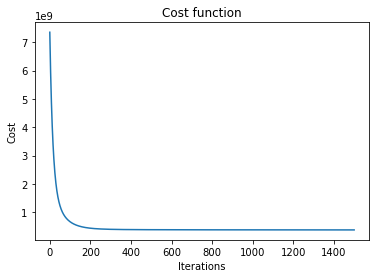

In [74]:
plt.plot(J_storage)
plt.title('Cost function')
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [75]:
# Call the predict method to get the y predicted using coeffs from GS and norm eqn 
pred = predict(df_feature, beta)

pred_n = predict(df_feature, beta_n)

print(pred)
print(pred_n)


[[ 18088.40275012]
 [ 19212.0916914 ]
 [ 19012.00524693]
 ...
 [532327.06065552]
 [534623.81253743]
 [532456.66515234]]
[[ 18799.11532709]
 [ 19777.78410432]
 [ 19553.62584146]
 ...
 [548369.74633939]
 [550938.74582734]
 [548958.35523169]]


In [76]:
# Generate line fit plots
# for i in range(len(feature)):
#     ft=feature[i]
#     plt.figure(i)
#     plt.scatter(df_feature[ft],target)
#     plt.scatter(df_feature[ft],pred)
#     plt.xlabel(ft)
#     plt.ylabel('total number of deaths')
#     plt.legend(['actual','predicted'])

### Evaluate model

Reasons for metrics:

1. Adjusted R2

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected.

In [77]:

# yes still meaningful, minimum mse with coeff
# if model is bad then mse may be big
mse=mean_squared_error(target,pred)
print('MSE: ',mse)

rse=np.sqrt(mse/(X.shape[0]-m-1))
print('RSE: ',rse)

r2=r2_score(target, pred)
print('r2: ',r2)

adj_r2=adj_r2_score(X,target,pred)
print('adjusted r2: ',adj_r2)


MSE:  750735505.3630497
RSE:  295.4569786026483
r2:  0.9422088094554505
adjusted r2:  0.9421281705849233


1. Is there a relationship between the response and predictors?

We set up a hypothesis test to asnwer this question.

Null hypothesis: H0 :β1 =β2 =···=βp =0

Alternative hypothesis: Ha : at least one βj is non-zero.

This hypothesis test is performed by computing the F-statistic. If Ha is true, then E{(TSS − RSS)/p} > σ2, so we expect F to be greater than 1.

F = 14125.72909, Significance F (p value associated with F statistic) = 0 < 0.01
The p-value associated with the F-statistic zero, so we have extremely strong evidence that at least one of the factors is associated with increased death rates from covid.

For each individual predictor, we also obtained a t-statistic and a p-value. *These provide information about whether each individual predictor is related to the response, after adjusting for the other predictors. It turns out that each of these are exactly equivalent7 to the F- test that omits that single variable from the model, leaving all the others in — i.e. q=1 in (3.24). So it reports the partial effect of adding that variable to the model.*

All the p-values of the t statitic is p<0.01. Since the number of predictors is relatively small, this also corroborates the conclusion made using the F-statistic that i the ith variable is related to total deaths of covid in the presence of the other n-1 predictors.

2. Which variables are more important?

Since we currently have 11 predictor variables, the model may be very complex and be prone to overfitting. Want to decrease model's complexity by selecting only the most important variables. For this we use **backward selection**. Observing the p-values of the various t-statitcs we can see that ```hospital_beds_per_thousand``` seems to have the highest p-value out of all and hence is the least statistically significant. We removed that variable and trained a multi linear regression model on the remaining 10 variables. The resulting model is performs to a similar standard.

We





Improvements:
- add RSE
- add adjusted R2
- cleaning data (quality of data)
- change of model

In [80]:
import itertools

def evalue_models_with_diff_feature_combinations(features):
    #1 get all different combinations of features
    store_evaluations = []
    for L in range(0, len(features)+1):
        #2 for each combination, run model, print combination, r2 and adj_r2
        for features_subset in itertools.combinations(features, L):
            features_list = [*features_subset]
            if features_list == []:
                continue
            #run base model
            df_feature, df_target = get_features_targets(df_covid, features_subset, ['total_deaths'])
            
            # Normalize features
            df_feature_z=normalize_z(df_feature)

            # Prepare X and target vector
            X = prepare_feature(df_feature_z)
            m=X.shape[1]
            target = prepare_target(df_target)

            # Set up gradient descent
            iterations = 1500
            alpha = 0.01
            beta = np.zeros((m,1))

            # Call the gradient_descent function
            beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
            # with np.printoptions(threshold=np.inf):
            #     print(beta)

            # Call the predict method to get the y predicted using coeffs from GS and norm eqn 
            pred = predict(df_feature, beta)

            mse_eval=mean_squared_error(target,pred)
            
            r2_eval = r2_score(target,pred)
            
            #adj_r2_eval
            adj_r2_eval=adj_r2_score(X,target,pred)
            
            
            print('―' * 10)
            print(f"feature combination: {features_subset}")
            print(f"mse {mse_eval}")
            print("r2",r2_eval)
            print("adj_r2",adj_r2_eval)
            print('―' * 10)

            store_evaluations.append([features_subset,mse_eval,r2_eval,adj_r2_eval])
    #print max 
    print('―' * 10)
    print('―' * 10)
    print('―' * 10)
    
    best_fit = max(store_evaluations, key=lambda x: x[3])
    print(f"best_fit combination:", best_fit[0])
    print(f"best_fit mse:", best_fit[1])
    print(f"best_fit r2_1:", best_fit[2])
    print(f"best_fit adj_r2_1:", best_fit[3])
    return None    

In [81]:

evalue_models_with_diff_feature_combinations(feature)


――――――――――
feature combination: ('population_density',)
mse 12848821534.193722
r2 0.010905054775036782
adj_r2 0.01067529985163962
――――――――――
――――――――――
feature combination: ('gdp_per_capita',)
mse 12641199990.089205
r2 0.026887642691529656
adj_r2 0.026661600332108404
――――――――――
――――――――――
feature combination: ('stringency_index',)
mse 12923866023.014341
r2 0.0051281728748615585
adj_r2 0.0048970760509068345
――――――――――
――――――――――
feature combination: ('total_tests',)
mse 2042532548.9259055
r2 0.8427670106380034
adj_r2 0.8427304872955268
――――――――――
――――――――――
feature combination: ('total_vaccinations',)
mse 2025606195.8202572
r2 0.844069991635392
adj_r2 0.8440337709598137
――――――――――
――――――――――
feature combination: ('reproduction_rate',)
mse 12975979442.635191
r2 0.0011165115884007593
adj_r2 0.0008844829035199453
――――――――――
――――――――――
feature combination: ('hospital_beds_per_thousand',)
mse 12402484029.799004
r2 0.045263861011568984
adj_r2 0.04504208722783187
――――――――――
――――――――――
feature 

# Add polynomial regression

In [82]:
def transform_features(df_feature, colname, colname_transformed,power):
    df_out=df_feature.copy()
    df_out.loc[:,colname_transformed]=df_feature[colname]**power #dont use lambda function, handles stuff differently
    # print(df_feature)
    return df_out

In [84]:

# df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])

feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']


all={}
for i in range(1,5):
    df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
    df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients", "icu_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^"+str(i),i)
    
    # normalize the feature using z normalization
    df_feature_z = normalize_z(df_feature)

    # print(df_feature.describe())
    X = prepare_feature(df_feature_z)
    # print(X)
    m=X.shape[1]
    target = prepare_target(df_target)

    iterations = 1500
    alpha = 0.01
    beta = np.zeros((m,1))

    # call the gradient_descent function
    beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
    # print('---',beta)

    # call the predict method to get the predicted values
    pred = predict(df_feature, beta)
    
    # print(pred)
    all[i]=pred

print(all)


{1: array([[ 18354.04115592],
       [ 19454.80097833],
       [ 19247.21138233],
       ...,
       [533386.46359989],
       [535755.07794509],
       [533644.19990599]]), 2: array([[ 12135.22642961],
       [ 13503.01600354],
       [ 13262.12007314],
       ...,
       [554008.43583369],
       [556407.50586019],
       [554223.57049332]]), 3: array([[ 11249.90356208],
       [ 12534.28812439],
       [ 12226.9606361 ],
       ...,
       [567060.56183007],
       [570148.10685462],
       [567343.0640611 ]]), 4: array([[ 12108.74389021],
       [ 13317.67183954],
       [ 13035.43371295],
       ...,
       [569179.55471049],
       [572525.20613392],
       [569377.79792539]])}


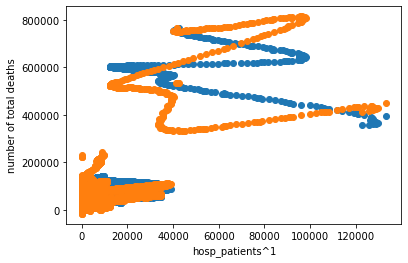

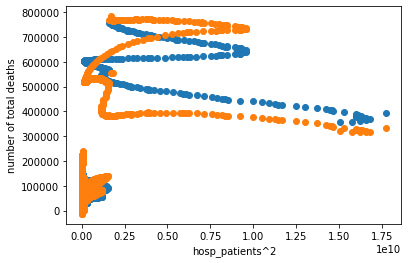

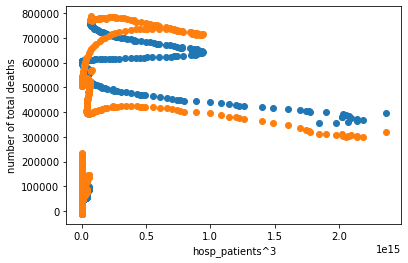

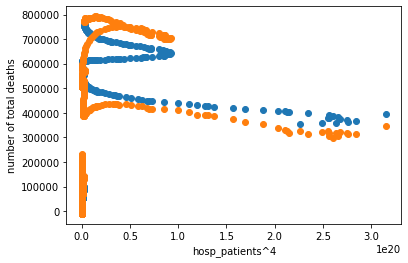

In [85]:
for i in range(1,5):
    pred=all[i]
    df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
    df_feature = transform_features(df_feature, "hosp_patients", "hosp_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "hosp_patients_per_million", "hosp_patients_per_million^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients", "icu_patients^"+str(i),i)
    df_feature = transform_features(df_feature, "icu_patients_per_million", "icu_patients_per_million^"+str(i),i)
    
    plt.figure(i)
    plt.scatter(df_feature['hosp_patients^'+str(i)],target)
    plt.scatter(df_feature['hosp_patients^'+str(i)],pred)
    plt.xlabel('hosp_patients^'+str(i))
    plt.ylabel('number of total deaths')

Power: 1
mse 748029391.6514018
r2 0.9424171245438243
adj_r2 0.9423099437612162
Power: 2
mse 543877046.8417352
r2 0.9581326554794585
adj_r2 0.9580547264994296
Power: 3
mse 527238823.28269607
r2 0.9594134564288664
adj_r2 0.9593379114431594
Power: 4
mse 533374260.7434778
r2 0.9589411539563749
adj_r2 0.9588647298595045


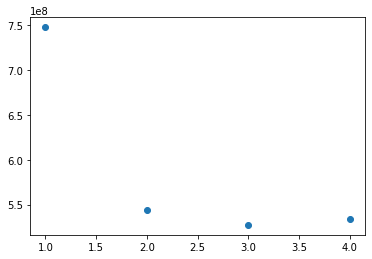

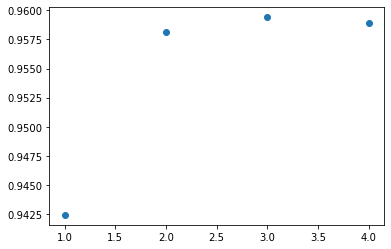

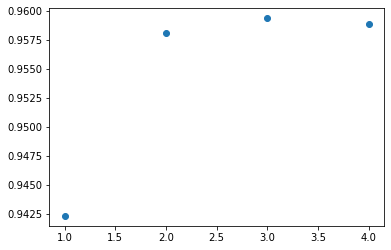

In [86]:
mse_all=[]
r2_all=[]
adj_r2_all=[]
power=list(range(1,5))
for i in range(1,5):
    print(f"Power: {i}")
    pred=all[i]
    mse2=mean_squared_error(target,pred)
    print("mse",mse2)
    mse_all.append(mse2)

    # why in HW9 can use r2 for mult linreg and polynomial reg
    r2_2=r2_score(target, pred)
    print("r2",r2_2)
    r2_all.append(r2_2)
    
    adj_r2_2=adj_r2_score(X,target,pred)
    print("adj_r2",adj_r2_2)
    adj_r2_all.append(adj_r2_2)

plt.figure(6)
plt.scatter(power,mse_all)
plt.figure(7)
plt.scatter(power,r2_all)
plt.figure(8)
plt.scatter(power,adj_r2_all)

Log

In [90]:
def transform_features_log(df_feature, colname, colname_transformed):
    df_out=df_feature.copy()
    df_out.loc[:,colname_transformed]=np.log(df_feature[colname]) 
    # print(df_feature)
    return df_out

In [93]:
# df_feature, df_target = get_features_targets(result, feature, ['total_deaths'])

feature=['population_density','gdp_per_capita',
         'stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']


df_feature, df_target = get_features_targets(df_covid, feature, ['total_deaths'])
print(df_feature.describe())
df_feature = transform_features_log(df_feature, "hosp_patients", "hosp_patients log",)
df_feature = transform_features_log(df_feature, "hosp_patients_per_million", "hosp_patients_per_million log")
df_feature = transform_features_log(df_feature, "icu_patients", "icu_patients log")
df_feature = transform_features_log(df_feature, "icu_patients_per_million", "icu_patients_per_million log")
    
# normalize the feature using z normalization
df_feature = normalize_z(df_feature)
print(df_feature)
X = prepare_feature(df_feature)
print(X)
m=X.shape[1]
target = prepare_target(df_target)

iterations = 1500
alpha = 0.01
beta = np.zeros((m,1))

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
# print('---',beta)

# call the predict method to get the predicted values
pred = predict(df_feature, beta)
print(pred)


       population_density  gdp_per_capita  stringency_index   total_tests  \
count         8613.000000     8613.000000       8613.000000  8.613000e+03   
mean           181.213815    38292.933000         54.579840  3.355424e+07   
std            272.950182    15485.446857         17.467398  9.264684e+07   
min             18.136000    18563.307000          0.000000  0.000000e+00   
25%             65.180000    27216.445000         43.520000  9.225990e+05   
50%            108.043000    35220.084000         53.700000  4.318483e+06   
75%            205.859000    45436.686000         68.520000  1.729714e+07   
max           1454.037000    94277.965000         88.890000  6.426871e+08   

       total_vaccinations  reproduction_rate  hospital_beds_per_thousand  \
count        8.613000e+03        8613.000000                 8613.000000   
mean         2.144171e+07           1.011840                    4.773741   
std          5.969634e+07           0.299095                    1.757520   
mi

C:\Users\KING\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


Text(0, 0.5, 'number of total deaths')

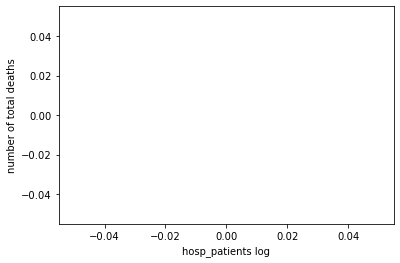

In [92]:

plt.scatter(df_feature['hosp_patients log'],target)
plt.scatter(df_feature['hosp_patients log'],pred)
plt.xlabel('hosp_patients log')
plt.ylabel('number of total deaths')

To do:
- interpret hypo test

# 2D meeting (21/11/21)

1. Joe's research
Key risk factors:
- age (85 and above)
- cardio disease
- death rates
- people vaccinated
- pop density
- hosp beds
- stringency index 
    - map 2 week's ago stringency index to today's death rate 
    - based on how long incubation to symptom to death

New way of calculating mortality
traditional: total death/ infected
modified: total death per day/ average number of infectiosn for past few days (icu cases for our case? KIV)

Things to do:
- HASS component (ST/ Henry)
    - Draft 1 (tues)
    - Dry run (wed)
- Find data for task 2 and confirm the question (Jen)
    - No mental health switch to economy
    - Use one of the backup question
    Question: Predict the economic health in the next financial quarter in post covid times
    Target: economic health (employment rate, growth rate)- pick one 
    Params:
    - infected rate/ death rate?
    - healthcare spending?
    - stringency
- SH to come up with prelim model (fix graph) by tmr
- filter out countries
    - similar gdp
    - choose big western europe countries 
- Joe incorporate comments into model to create v2
- Fradt ideas on website (SH)

-------------------

#### Mon
- HASS meeting after test
Agenda:
- fix the direction of the presentation
    - topic
    - which writer we are applying
    - main points and analysis
- leave the making of slides and script to ST and henry

#### Tues
- Math consult
- Meet Samson (3.30-4.30pm)

#### Wed
- HASS dry run
- UPOP (1-6pm, Jen, Joe, SH)

#### Thurs
- HASS presentation
- Polish task 1 and 2
- Film video

#### Fri
**Due time: 6pm**

Questions (georgious):

1. Why is the plot of pred vs a certain param not a straight line?
- the variable could have very little relation to the y (eg Y = 0 X1 + 10 X2)
- when you look at the plot of X1 against Y, you are projecting a higher dimension space into a lower dimension space
- the values of y could have been affected by many hidden variables that push it away from the expected linear relationship
- ie many small pertubations that push the the values of y away from the linear line with x

2. How did the model produce that curvy line that seems to model that particular parameter very well?
- the effect of many hidden variables?
- choosing a very good subset of variables?

3. Why is r2 not a good metric?
- you can use r2 to compare between diff models with same number of features
- not good to use r2 to compare between models with diff num of features because can always arbitarily increase r2 through increasing the number of features
- 

4. What metric should we use to evaluate the model?
- adjusted r square?

5. How can we use the relationships we observe to pick which features to raise to power? eg observe a pair plot with a log rs between x and y
- generally, we will not know the relation between a feature and y just from the pair plot. we use lin reg to figure out the relation between a feature and y
- we just try randomly transforming each feature
- a small case will if you see a log relationship and then you do a log transformation in the model on that feature

6. How do we compare our resulst from GS to normal equation? coeff or error?
- both
- Why is the coeff not exactly the same?
- norm equation assumes X is invertible so there is a unique solution. Is the matrix X invertible? Does the answer have to be unqiue? Can I compare the 2 mse?

7. Does the mse here even mean anything? We are deriving the beta from the train set then getting the predicted y from the same train set
- yes, we are evaluating the fit of the model to your data, just cannot see how well your model generalises (not the pt of this exercise)
- 